In [2]:
import cv2
import numpy as np
from scipy import ndimage
from IPython.display import Image,display

print(cv2.__version__)

4.5.3


In [9]:
kernel_3x3 = np.array([[-1, -1, -1],
                       [-1, 8, -1],
                       [-1, -1, -1]])

kernel_5x5 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, 1, 2, 1, -1],
    [-1, 2, 4, 2, -1],
    [-1, 1, 2, 1, -1],
    [-1, -1, -1, -1, -1]
])

img = cv2.imread('data/statue.png', cv2.IMREAD_GRAYSCALE)

k3 = ndimage.convolve(img, kernel_3x3)
k5 = ndimage.convolve(img, kernel_5x5)

blurred = cv2.GaussianBlur(img, (17, 17), 0)
g_hpf = img - blurred

cv2.imshow("3x3", k3)
cv2.imshow("5x5", k5)
cv2.imshow("blurred", blurred)
cv2.imshow("g_hpf", g_hpf)
cv2.waitKey()
cv2.destroyAllWindows()

## Contour Detection

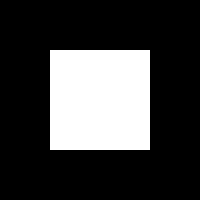

In [17]:


img = np.zeros((200, 200), dtype=np.uint8)

img[50:150, 50:150] = 255

file = 'data/simple_square.png'
cv2.imwrite(file, img)
display(Image(file))

#### What are contours

[array([[[ 50,  50]],

       [[ 50, 149]],

       [[149, 149]],

       [[149,  50]]], dtype=int32)]


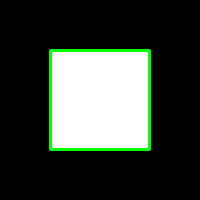

In [21]:
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

contours, heirarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

In [ ]:
color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

img_with_contours = cv2.drawContours(color, contours, -1, (0, 255, 0), 2)

file = 'data/simple_square_outlined.png'
cv2.imwrite(file, img_with_contours)
display(Image(file))

## Bounding box, min area, and minimum enclosing circle

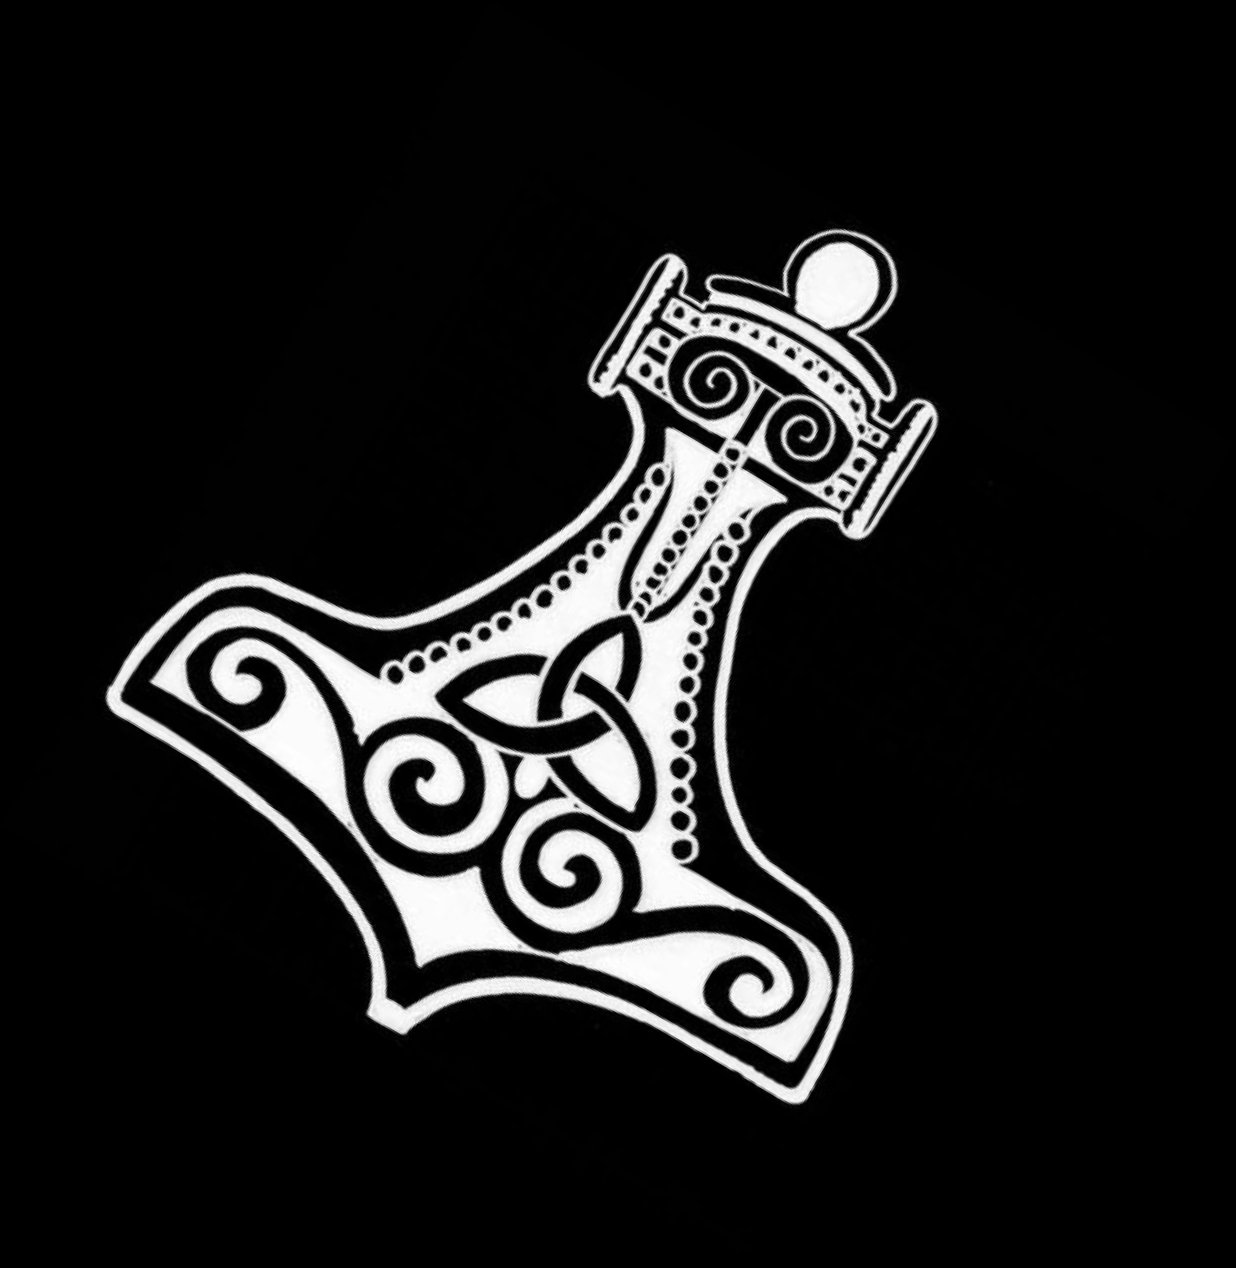

In [27]:
display(Image('data/hammer.jpg'))

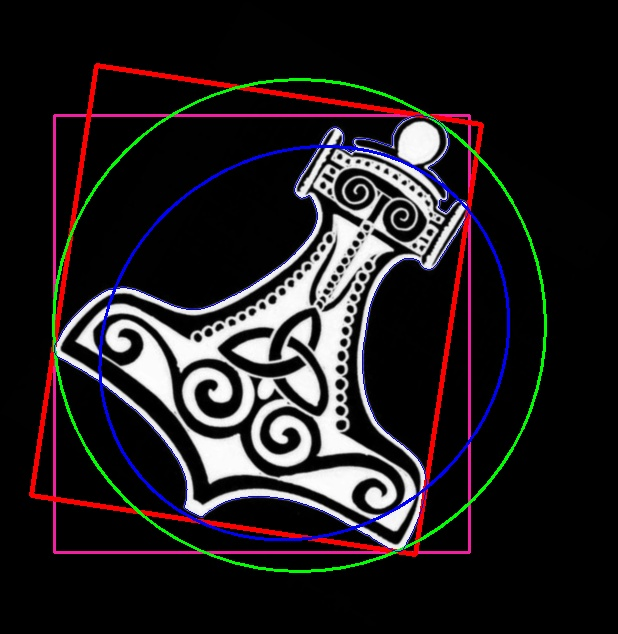

In [41]:
hammer = cv2.pyrDown(cv2.imread('data/hammer.jpg', cv2.IMREAD_UNCHANGED))


ret, thresh = cv2.threshold(cv2.cvtColor(hammer, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    #find bounding box coordinates
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(hammer, (x, y), (x+w, y+h), (160, 32, 240), 2)
    
    # find the minimum area
    rect = cv2.minAreaRect(c)
    
    # calculate the coordinates of the minimum area rectangle
    box = cv2.boxPoints(rect)
    
    # normalize the coordinates to integers
    box = np.int0(box)
    
    # draw contours
    cv2.drawContours(hammer, [box], 0, (0, 0, 255), 3)
    
    #calculate center and radius of minimum enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    
    # cast to integers
    center = (int(x), int(y))
    radius = int(radius)
    
    #draw the circle
    img = cv2.circle(hammer, center, radius, (0, 255, 0), 2)
    
    
    ellipse = cv2.fitEllipse(c)
    cv2.ellipse(hammer, ellipse, (255,0,0), 2)
    
cv2.drawContours(hammer, contours, -1, (255, 0, 0), 1)

file = 'data/hammer_contours.jpg'
cv2.imwrite(file, hammer)
display(Image(file))

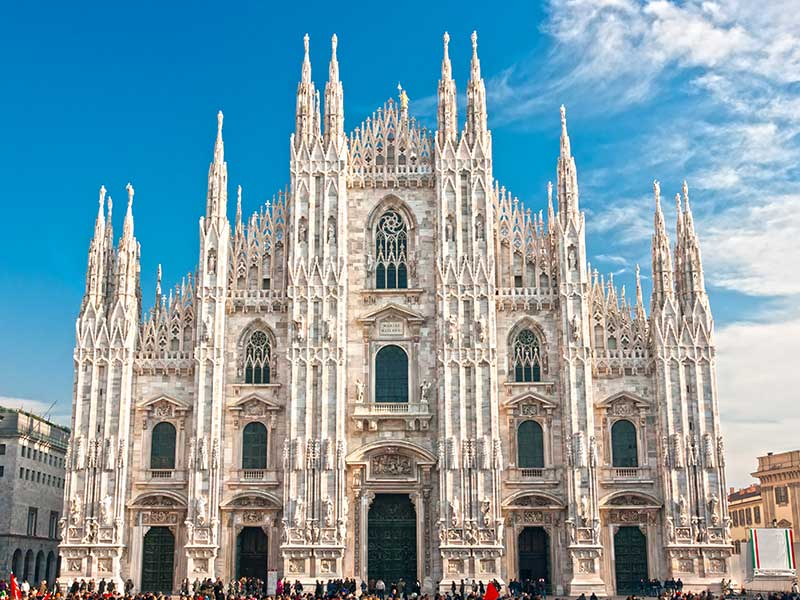

In [42]:
file = 'data/lines.jpg'
display(Image(file))

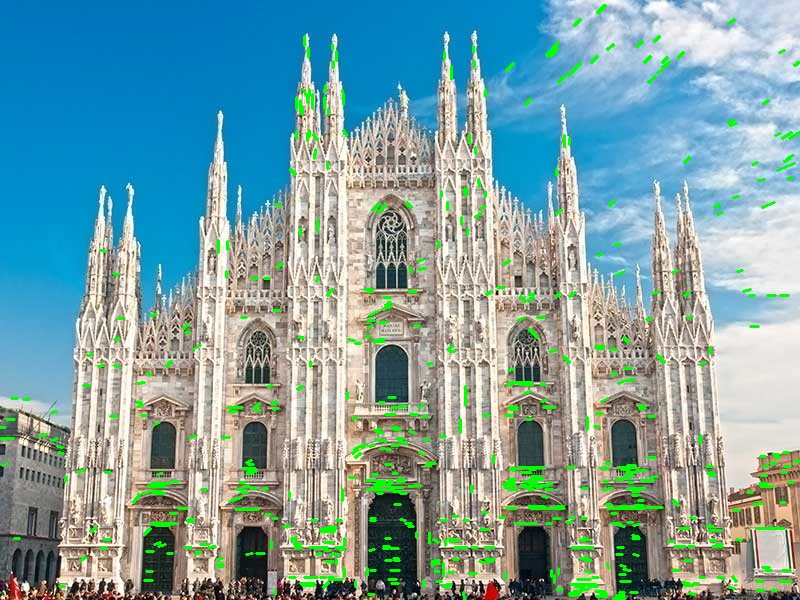

In [50]:
line_img = cv2.imread(file)

gray = cv2.cvtColor(line_img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 120)

minLineLength = 20
maxLineGap = 5

lines = cv2.HoughLinesP(edges, 1, np.pi / 180.0, 20, minLineLength, maxLineGap)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
file = 'data/lines_processed.jpg'
cv2.imwrite(file, line_img)
display(Image(file))    